In [4]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [5]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [6]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Affiliation', ylabel='count'>

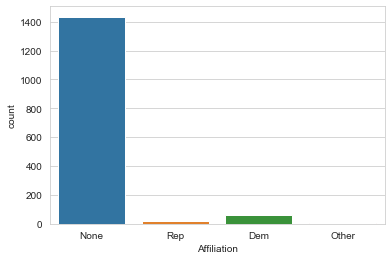

In [9]:
sns.countplot('Affiliation',data=poll_df)
# most polls are unaffiliated - more dem than rep, important to keep in mind whilst analyzing

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Affiliation', ylabel='count'>

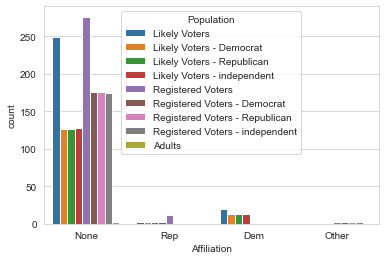

In [10]:
sns.countplot('Affiliation',data=poll_df,hue='Population') # plotting affiliation, hue=population

In [11]:
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)
avg.drop('Other',axis=0,inplace=True)
# getting an average of the polls, leaving out irrelevant data

In [13]:
avg

,0
Trump,40.643890
Clinton,42.733903
Undecided,9.315068


In [14]:
# same for standard deviation
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)
std.drop('Other',axis=0,inplace=True)

In [15]:
std

,0
Trump,23.566390
Clinton,25.298731
Undecided,6.253118


<AxesSubplot:>

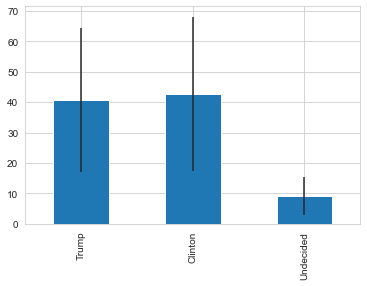

In [16]:
avg.plot(yerr=std,kind='bar',legend=False)

In [18]:
poll_avg = pd.concat([avg,std],axis=1)

In [19]:
poll_avg.columns = ['Average','STD']

In [20]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


In [21]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='End Date'>

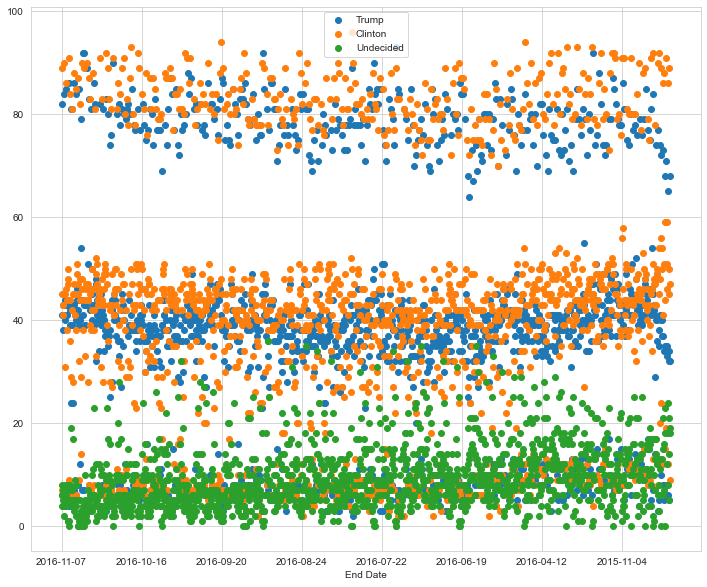

In [27]:
poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'],linestyle='',marker='o',figsize=(12,10))

In [28]:
from datetime import date

In [29]:
poll_df['Difference2'] = abs(poll_df['Trump'] - poll_df['Clinton']) 
poll_df.head()



,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference2
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,4.0
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,83.0
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,75.0
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,5.0
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,2.0


In [30]:
poll_df.drop('Difference2',axis=1,inplace=True)

In [31]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,https://elections.huffingtonpost.com/pollster/...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,None,NaN,1
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1
1520,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,679.0,Registered Voters - Republican,Live Phone,68.0,9.0,4.0,19.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1


In [34]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100

In [35]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
# group it by the start date to see how sentiment changer over time
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


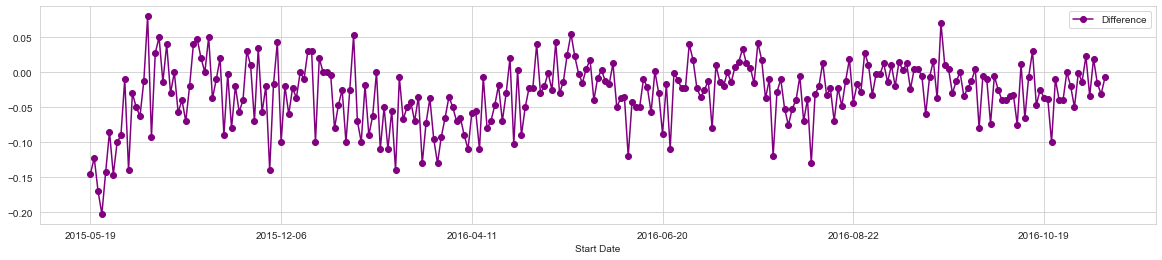

In [36]:
# Plotting the difference in polls between Trump and Clinton
# plotting Start date vs difference
fig = poll_df.plot('Start Date','Difference',figsize=(20,4),marker='o',linestyle='-',color='purple')

# as we are calculating Trump-Clinton, anything positive leans towards Trump, negative towards Clinton
# voter sentiment over time by calculating difference, minus values favoring Clinton, what happened then?

In [37]:
# Let's find out when the debates happened.. Sept and Oct 2016.. let's find those x values
# Set row count and xlimit list
row_in = 0
xlimit_sept = []
xlimit_oct = []

# Cycle through dates until 2016-09 and 2016-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit_sept.append(row_in)
        row_in +=1
    elif date[0:7] == '2016-10':
        xlimit_oct.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print('For september:')
print(min(xlimit_sept))
print(max(xlimit_sept))
print('For october:')
print(min(xlimit_oct))
print(max(xlimit_oct))

For september:
209
231
For october:
232
262


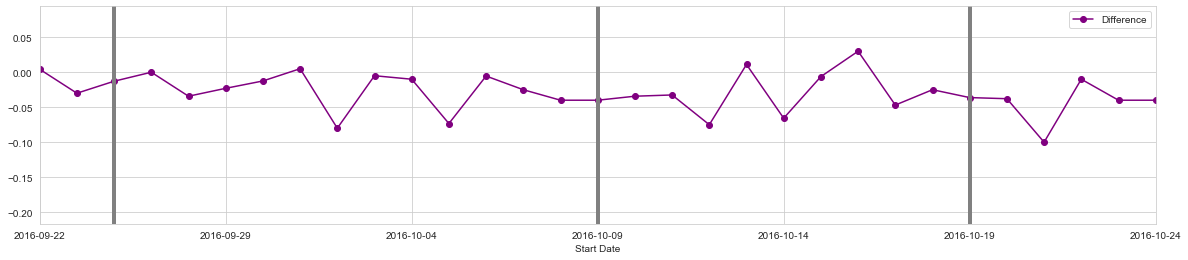

In [38]:
# Plotting the difference in polls between Trump and Clinton, during debates in oct 16

fig = poll_df.plot('Start Date','Difference',figsize=(20,4),marker='o',linestyle='-',color='purple',xlim=(225,255))

# Now add the debate markers
# First debate --> 26 oct
plt.axvline(x=209+18, linewidth=4, color='grey')
# Second debate -->9 oct
plt.axvline(x=232+8, linewidth=4, color='grey')
# Third debate --> 19 oct
plt.axvline(x=232+18, linewidth=4, color='grey')


# # For all these polls it is important to remeber how 
# geographical location can effect the value of a poll in predicting the outcomes of a national election. 

In [40]:
print(poll_df.loc[range(209,231)])

     Start Date  Number of Observations      Trump    Clinton     Other  \
209  2016-09-01             1021.333333  38.666667  40.095238  6.941176   
210  2016-09-04              538.500000  39.750000  38.750000  6.250000   
211  2016-09-05             8585.500000  43.500000  45.500000  4.000000   
212  2016-09-06              903.555556  42.000000  40.500000  3.000000   
213  2016-09-08             1043.500000  40.750000  40.500000  6.250000   
214  2016-09-09             1433.000000  44.000000  42.750000  5.625000   
215  2016-09-10              635.800000  40.800000  43.200000  4.200000   
216  2016-09-11              867.000000  40.250000  39.750000  5.250000   
217  2016-09-12             7165.750000  43.142857  42.714286  4.000000   
218  2016-09-15              796.764706  40.448276  41.000000  6.440000   
219  2016-09-16              922.000000  37.000000  43.000000  7.000000   
220  2016-09-17              495.000000  45.000000  45.750000  4.750000   
221  2016-09-18          

In [44]:
poll_df[poll_df['Start Date'] == '2016-09-01']

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
209,2016-09-01,1021.333333,38.666667,40.095238,6.941176,10.285714,1.380952,-0.014286


The questions we will be trying to answer while looking at this Data Set is:
1.) How much was donated and what was the average donation?
2.) How did the donations differ between candidates?
3.) How did the donations differ between Democrats and Republicans?
4.) What were the demographics of the donors?
5.) Is there a pattern to donation amounts?

In [45]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
donor_df.info()
# biggest data set up until now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [47]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [49]:
donor_df['contb_receipt_amt'].value_counts()
# which amount was donated the most?

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [53]:
don_mean = donor_df['contb_receipt_amt'].mean() # calc donation average

don_std = donor_df['contb_receipt_amt'].std() # calc donation std

print('The average donation was %.2f with an std of %.2f' %(don_mean,don_std)) # summing it up with f string

# The STD is very large, meaning that the amounts vary by large proportions

The average donation was 298.24 with an std of 3749.67


In [54]:
# Let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

# Now sort it
top_donor.sort_values()

# Then check the Series
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [56]:
# Get rid of the negative values  -- since refunds appear in data as well 
top_donor = top_donor[top_donor >0]

# Sort the Series
top_donor.sort_values()

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

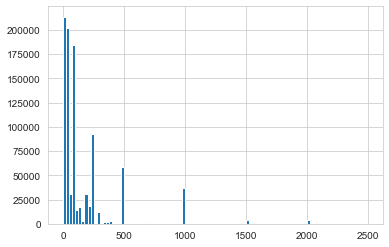

In [57]:
# Create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don.hist(bins=100)

In [58]:
cand = donor_df.cand_nm.unique()    # creating an object with all unique candidates

cand

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations. Lecture 36 has a review of this topic.

In [60]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [61]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
# getting rid of negative values for the original column

In [62]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [63]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

# Displaying candidates using groupby, furthermore showing how many donations per candidate

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [64]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum() # calculating total donation per candidate
# Unfortunately not very readable

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [67]:
# Start by setting the groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1
       # using this, otherwise loop will remain stuck on first candidate

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




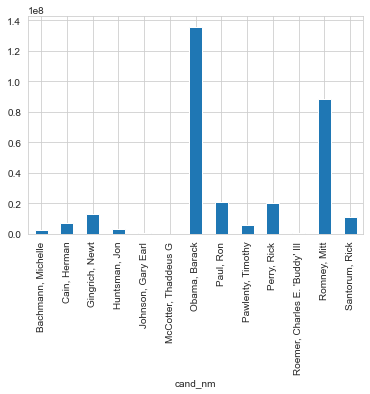

In [69]:
cand_amount.plot(kind='bar')
plt.show()
# quickly visualizing the donation amounts per candidate, obama doesn't have to compete with other democrats

<AxesSubplot:xlabel='Party'>

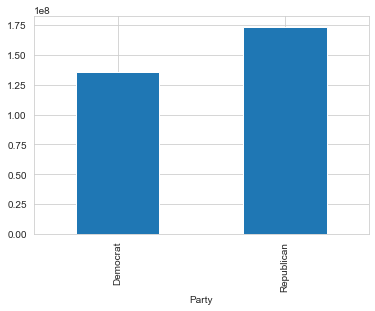

In [70]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
# grouping df by party, plotting sum of contribution amount
# Obama has less funding, but has the advantage of not having to split donations

In [71]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',   # grabbing contribution amounts
                              index='contbr_occupation',    # index (rows) by occupation
                              columns='Party',              # only relevant volumn is party
                              aggfunc='sum')                # summing donations up

In [72]:
occupation_df.shape  # far too large to display, let's cut off small donations and look at the big contributors

(45067, 2)

In [73]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]  # checking where 1 donations was larger than 1m

In [74]:
occupation_df.shape  # filtered all big contributors

(31, 2)

<AxesSubplot:xlabel='contbr_occupation'>

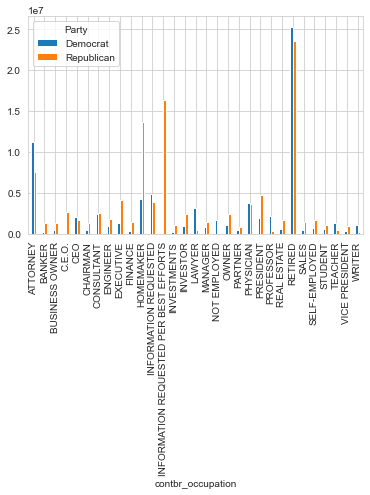

In [76]:
occupation_df.plot(kind='bar')  # let's plot out the big contributors by their occupation

<AxesSubplot:ylabel='contbr_occupation'>

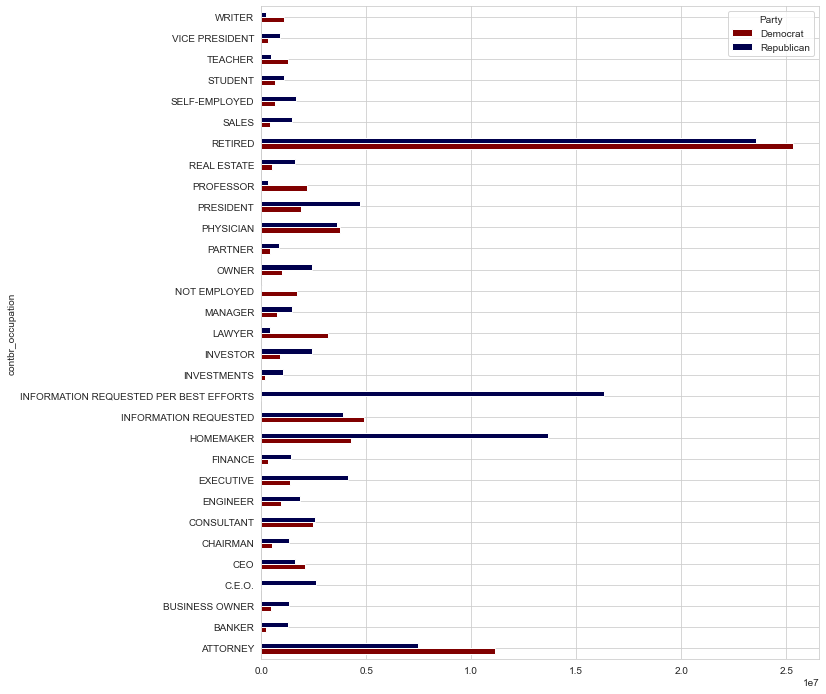

In [79]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic_r') 
# plotting it to be horizontal - with colormap

In [80]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)
# getting rid of non existent occupations

In [81]:
# There are two C.E.O. occupations, let's combine them and drop the obselete one

occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.',inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

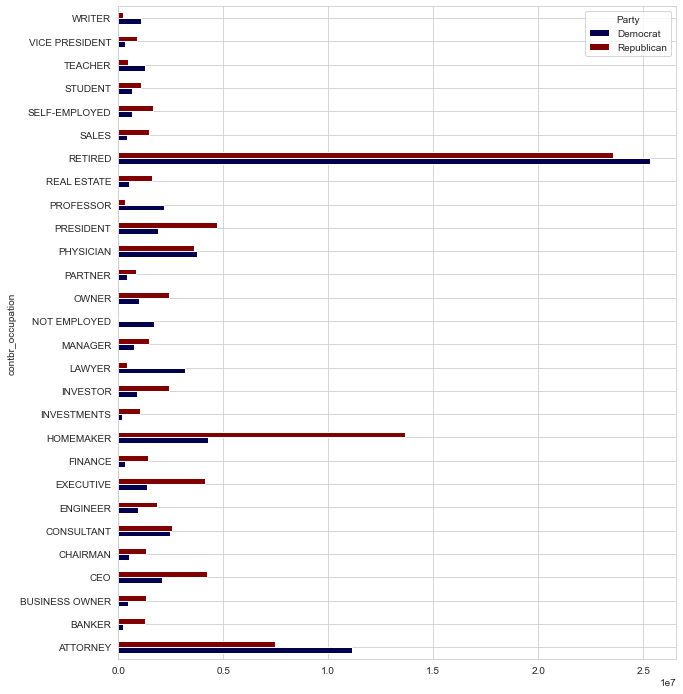

In [82]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic') 

#Plotting DF again after dropping non existent occupations, and combining the two CEO indexes